In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Toy_model import *
import sys 
sys.path.append("../utils") 
from Evaluation_plot import *

2024-01-13 10:03:25.768155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-13 10:03:25.834730: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
toymodel = Toymodel()

(1001, 19)


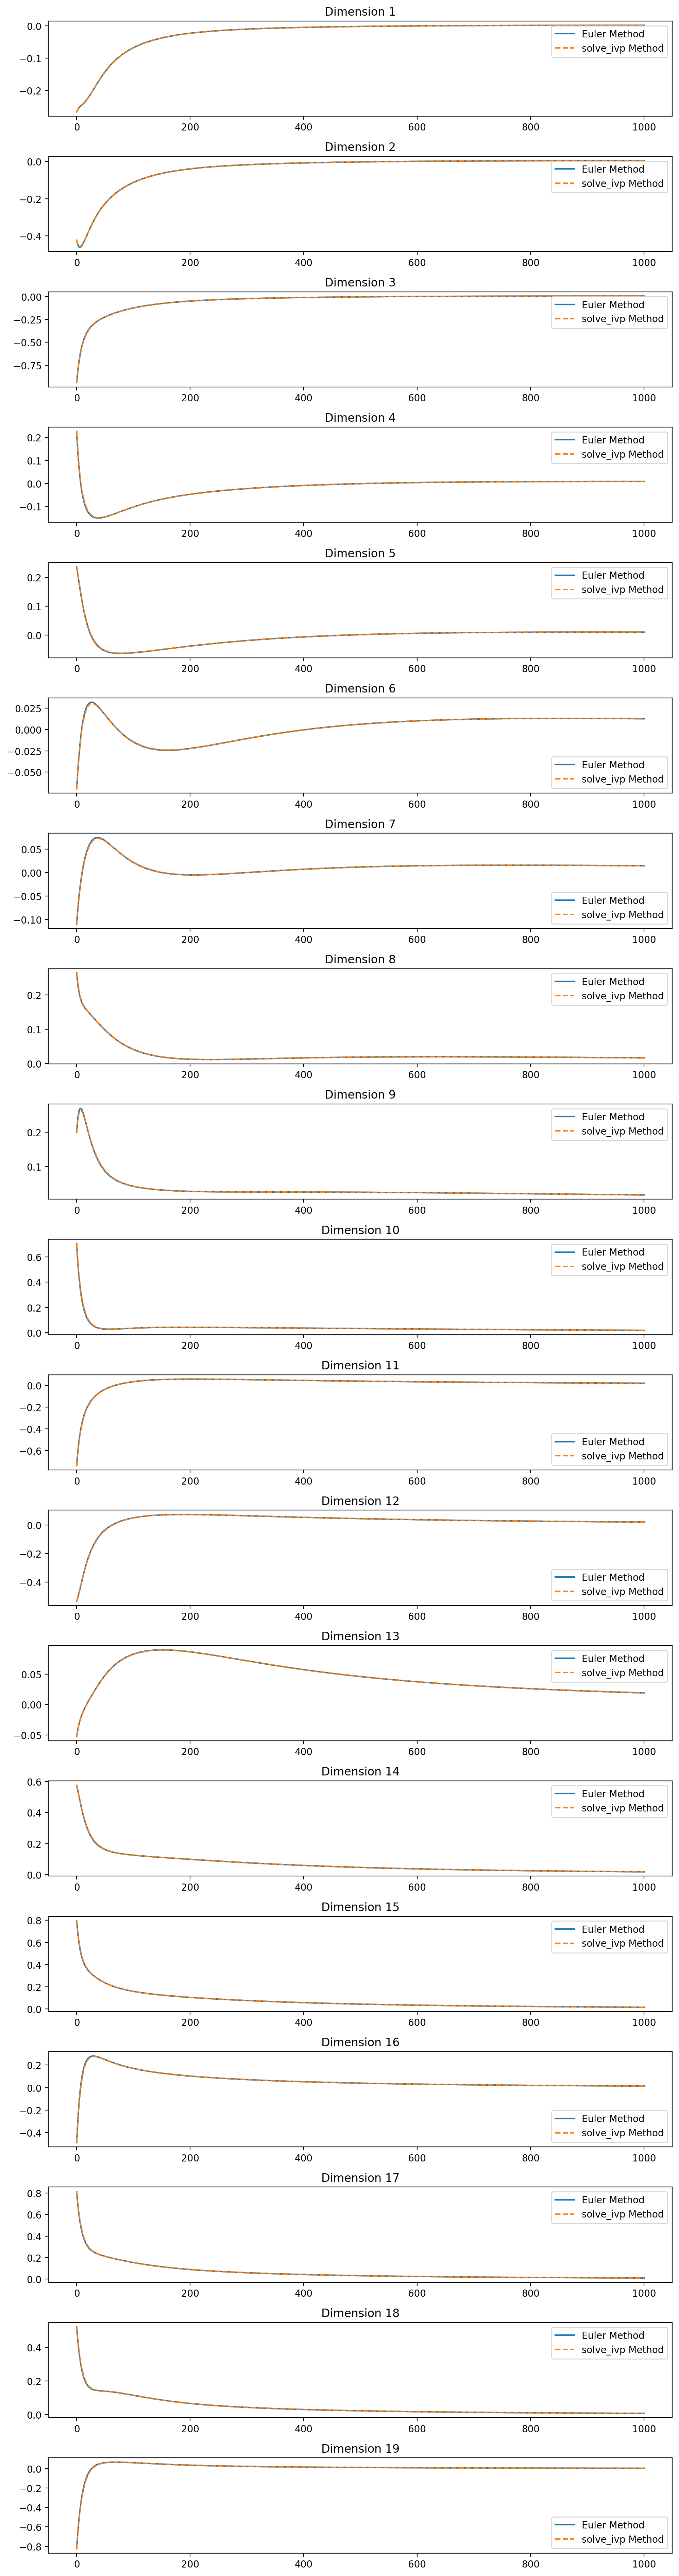

In [6]:
dlt_t = 0.0001
steps = 1000
u0 = 2 * np.random.rand(toymodel.dim - 1) - 1
traj_euler = toymodel.generate_traj(steps, u0, dlt_t = dlt_t)
traj_ivp = toymodel.generate_traj_solve_ivp(steps, u0, dlt_t = dlt_t)

fig, axs = plt.subplots(toymodel.dim - 1, 1, figsize=(10, 2 * (toymodel.dim - 1)))
for i in range(toymodel.dim - 1):
    axs[i].plot(traj_euler[:, i], label='Euler Method')
    axs[i].plot(traj_ivp[:, i], label='solve_ivp Method', linestyle='--')
    axs[i].set_title(f'Dimension {i+1}')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [7]:
# x_data, y_data, x_laplace_data, y_laplace_data = toymodel.genarate_training_data(steps = 10, traj_num = 500, dlt_t = dlt_t, type = 'Euler-forward')
x_data, y_data, x_laplace_data, y_laplace_data = toymodel.genarate_training_data(steps = 10, traj_num = 500, dlt_t = dlt_t, type = 'Solve_ivp')

(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(

In [37]:
reaction_term = toymodel.reaction_term(x_data)

In [38]:
combined_model_euler_forward = LinearModelCombiningNN()
# combined_model_euler_forward.train_NN(x_data, reaction_term, epochs=200, learning_rate=0.001)

In [39]:
# Dictionary setting
error_bound = 1e-8
poly = DicPoly(10)
iterative_steps = 10

In [40]:
combined_model_euler_forward = LinearModelCombiningNN()
err_history_euler_forward = combined_model_euler_forward.iterative_train(x_data, y_data, 
                        x_laplace_data, y_laplace_data, 
                        iterative_steps = iterative_steps, epochs = 200, type = 'Euler-forward', 
                        acc = False)


0.03764684163290973
Epoch 1/200
19/19 - 1s - loss: 0.2194 - val_loss: 0.2035 - 756ms/epoch - 40ms/step
Epoch 2/200
19/19 - 0s - loss: 0.1897 - val_loss: 0.1752 - 88ms/epoch - 5ms/step
Epoch 3/200
19/19 - 0s - loss: 0.1625 - val_loss: 0.1489 - 82ms/epoch - 4ms/step
Epoch 4/200
19/19 - 0s - loss: 0.1369 - val_loss: 0.1243 - 87ms/epoch - 5ms/step
Epoch 5/200
19/19 - 0s - loss: 0.1137 - val_loss: 0.1027 - 121ms/epoch - 6ms/step
Epoch 6/200
19/19 - 0s - loss: 0.0933 - val_loss: 0.0833 - 80ms/epoch - 4ms/step
Epoch 7/200
19/19 - 0s - loss: 0.0749 - val_loss: 0.0661 - 84ms/epoch - 4ms/step
Epoch 8/200
19/19 - 0s - loss: 0.0591 - val_loss: 0.0518 - 87ms/epoch - 5ms/step
Epoch 9/200
19/19 - 0s - loss: 0.0463 - val_loss: 0.0405 - 86ms/epoch - 5ms/step
Epoch 10/200
19/19 - 0s - loss: 0.0367 - val_loss: 0.0328 - 86ms/epoch - 5ms/step
Epoch 11/200
19/19 - 0s - loss: 0.0306 - val_loss: 0.0281 - 83ms/epoch - 4ms/step
Epoch 12/200
19/19 - 0s - loss: 0.0269 - val_loss: 0.0251 - 79ms/epoch - 4ms/step
Ep

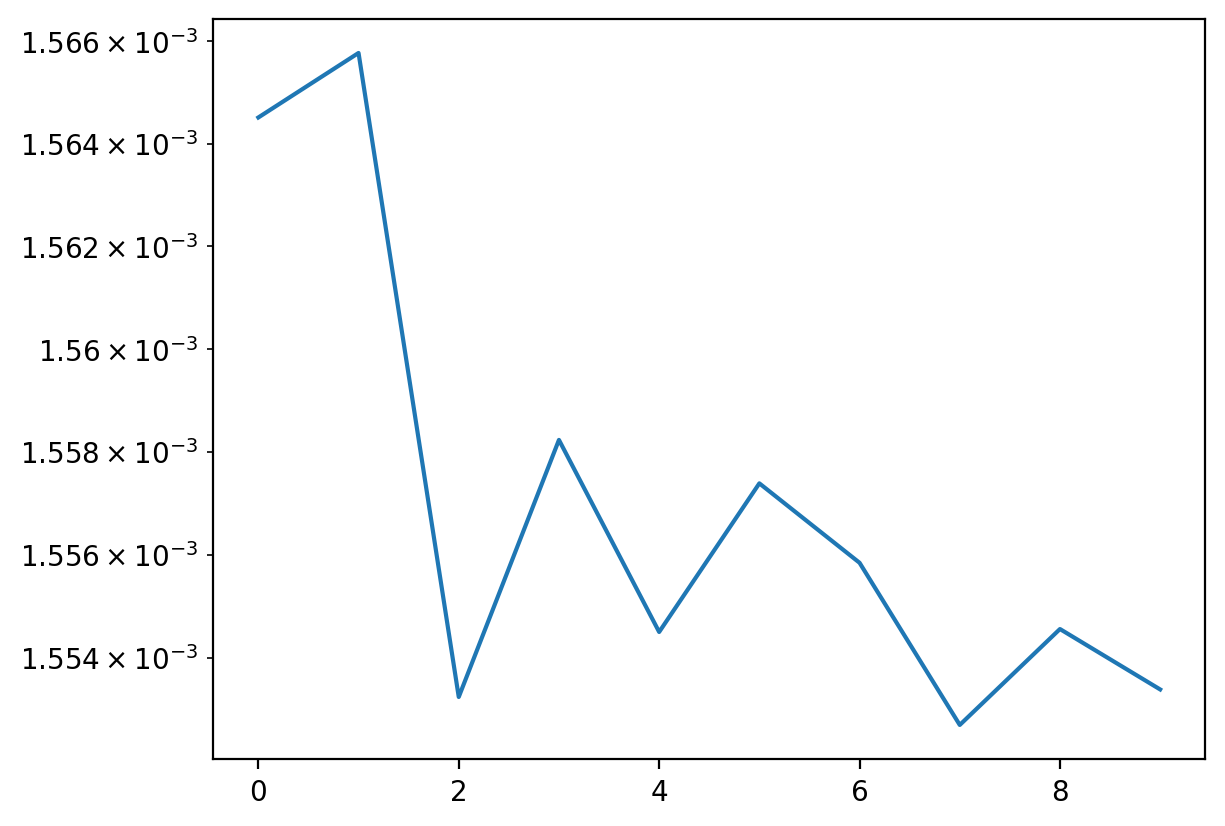

In [41]:
plt.plot(err_history_euler_forward)
plt.yscale('log')

In [42]:
combined_model_euler_backward = LinearModelCombiningNN()
err_history_euler_backward = combined_model_euler_backward.iterative_train(x_data, y_data, 
                        x_laplace_data, y_laplace_data, 
                        iterative_steps = iterative_steps, epochs = 200, type = 'Euler-backward', 
                        acc = False)


Epoch 1/200
19/19 - 1s - loss: 0.2096 - val_loss: 0.1934 - 781ms/epoch - 41ms/step
Epoch 2/200
19/19 - 0s - loss: 0.1806 - val_loss: 0.1653 - 81ms/epoch - 4ms/step
Epoch 3/200
19/19 - 0s - loss: 0.1532 - val_loss: 0.1390 - 70ms/epoch - 4ms/step
Epoch 4/200
19/19 - 0s - loss: 0.1270 - val_loss: 0.1130 - 76ms/epoch - 4ms/step
Epoch 5/200
19/19 - 0s - loss: 0.1013 - val_loss: 0.0878 - 79ms/epoch - 4ms/step
Epoch 6/200
19/19 - 0s - loss: 0.0770 - val_loss: 0.0650 - 123ms/epoch - 6ms/step
Epoch 7/200
19/19 - 0s - loss: 0.0558 - val_loss: 0.0459 - 76ms/epoch - 4ms/step
Epoch 8/200
19/19 - 0s - loss: 0.0388 - val_loss: 0.0315 - 81ms/epoch - 4ms/step
Epoch 9/200
19/19 - 0s - loss: 0.0267 - val_loss: 0.0220 - 95ms/epoch - 5ms/step
Epoch 10/200
19/19 - 0s - loss: 0.0190 - val_loss: 0.0164 - 84ms/epoch - 4ms/step
Epoch 11/200
19/19 - 0s - loss: 0.0148 - val_loss: 0.0135 - 81ms/epoch - 4ms/step
Epoch 12/200
19/19 - 0s - loss: 0.0129 - val_loss: 0.0124 - 85ms/epoch - 4ms/step
Epoch 13/200
19/19 - 0

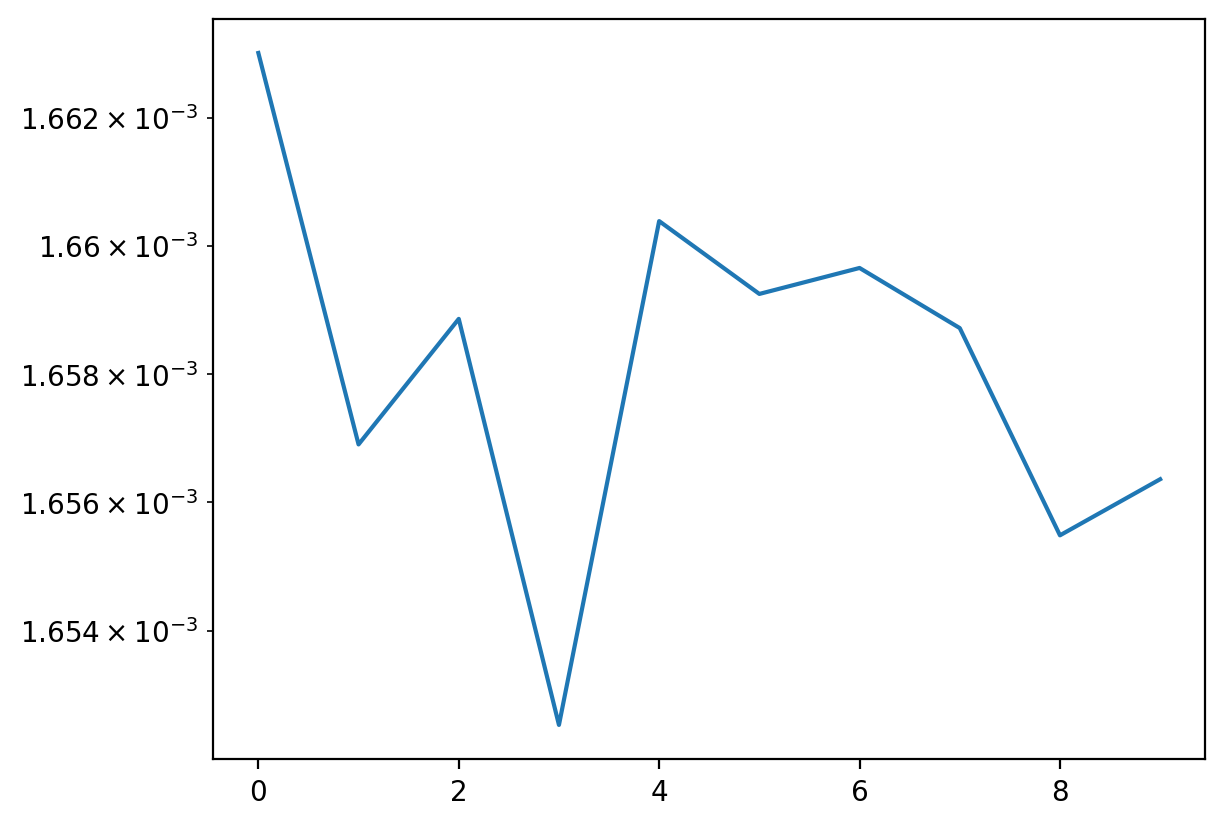

In [43]:
plt.plot(err_history_euler_backward)
plt.yscale('log')

In [44]:
combined_model_central_difference = LinearModelCombiningNN()
err_history_central_difference = combined_model_central_difference.iterative_train(x_data, y_data, 
                        x_laplace_data, y_laplace_data, 
                        iterative_steps = iterative_steps, epochs = 200, type = 'Central-difference', 
                        acc = False)


Epoch 1, Training Loss: 0.3153746426105499, Validation Loss: 0.3124338388442993
Epoch 2, Training Loss: 0.31268423795700073, Validation Loss: 0.30975988507270813
Epoch 3, Training Loss: 0.30999910831451416, Validation Loss: 0.30708742141723633
Epoch 4, Training Loss: 0.3073156476020813, Validation Loss: 0.304415762424469
Epoch 5, Training Loss: 0.3046329617500305, Validation Loss: 0.3017728626728058
Epoch 6, Training Loss: 0.3019798696041107, Validation Loss: 0.299049973487854
Epoch 7, Training Loss: 0.2992461621761322, Validation Loss: 0.29634422063827515
Epoch 8, Training Loss: 0.2965293824672699, Validation Loss: 0.2936222553253174
Epoch 9, Training Loss: 0.29379644989967346, Validation Loss: 0.2908998429775238
Epoch 10, Training Loss: 0.2910630404949188, Validation Loss: 0.2882101535797119
Epoch 11, Training Loss: 0.28836244344711304, Validation Loss: 0.2855435907840729
Epoch 12, Training Loss: 0.2856849730014801, Validation Loss: 0.2828724980354309
Epoch 13, Training Loss: 0.28300

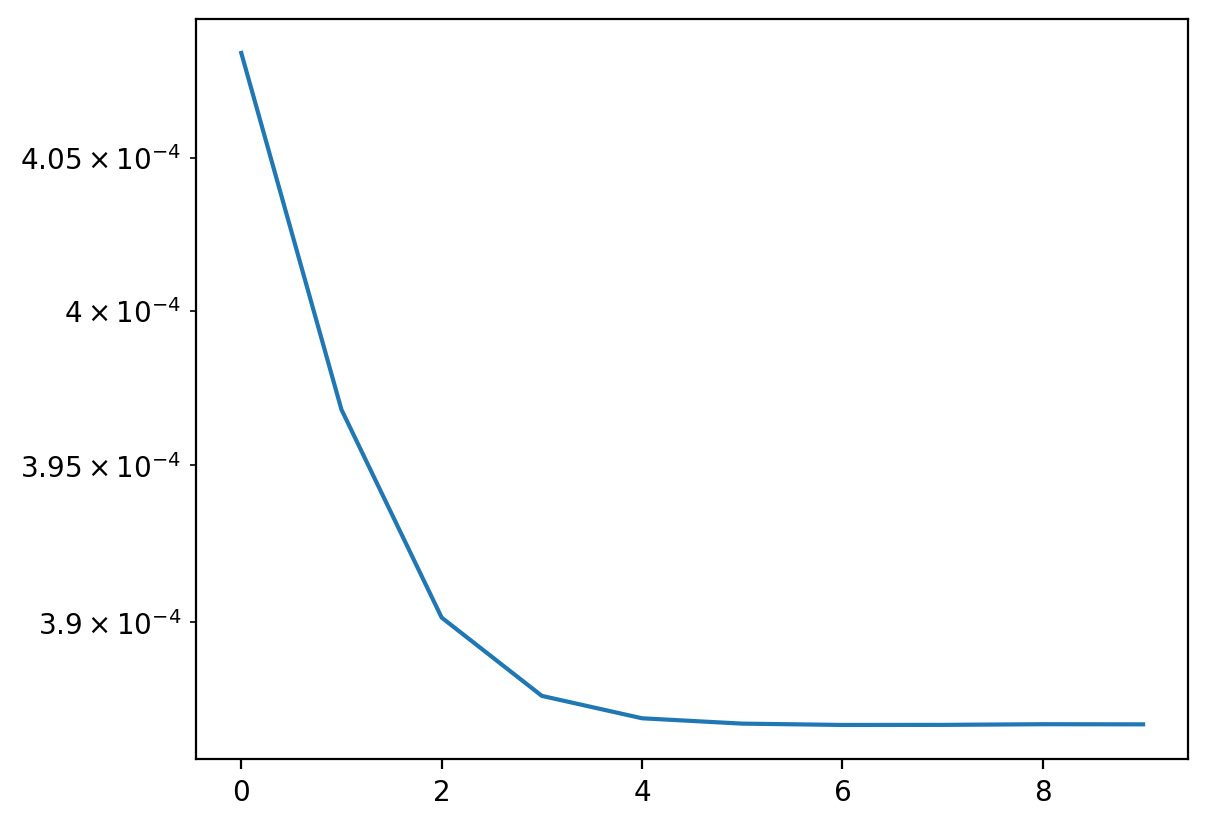

In [45]:
plt.plot(err_history_central_difference)
plt.yscale('log')

## Prediction

In [49]:
predict_num = 1
steps = 1000
dlt_x = 0.05

euler_forward_history = []
euler_backward_history = []
central_difference_history = []

euler_forward_traj_history = []
euler_backward_traj_history = []
central_difference_traj_history = []

test_traj_history = []
for i in range(predict_num):
    u0 = np.random.rand(toymodel.dim - 1)
    u_test = toymodel.generate_traj_solve_ivp(steps = steps, u0 = u0, dlt_t = dlt_t)
    u_euler_forward = combined_model_euler_forward.euler_forward_prediction(u0,steps)
    u_euler_backward = combined_model_euler_backward.euler_backward_prediction(u0, steps)
    u_central_difference = combined_model_central_difference.central_difference_prediction(u0, steps)

    euler_forward_history.append(np.linalg.norm(u_test - u_euler_forward, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    euler_backward_history.append(np.linalg.norm(u_test - u_euler_backward, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))
    central_difference_history.append(np.linalg.norm(u_test - u_central_difference, ord=2, axis = 1)/np.linalg.norm(u_test, ord = 2))

    euler_forward_traj_history.append(u_euler_forward)
    euler_backward_traj_history.append(u_euler_backward)
    central_difference_traj_history.append(u_central_difference)
    test_traj_history.append(u_test)
    print(i)

(1001, 19)
0
1


KeyboardInterrupt: 

In [50]:
import numpy as np
import os

save_dir = 'plot_data'
os.makedirs(save_dir, exist_ok=True)

# Save the lists
np.save(os.path.join(save_dir, 'euler_forward_history.npy'), euler_forward_history)
np.save(os.path.join(save_dir, 'euler_backward_history.npy'), euler_backward_history)
np.save(os.path.join(save_dir, 'central_difference_history.npy'), central_difference_history)
np.save(os.path.join(save_dir, 'euler_forward_traj_history.npy'), euler_forward_traj_history)
np.save(os.path.join(save_dir, 'euler_backward_traj_history.npy'), euler_backward_traj_history)
np.save(os.path.join(save_dir, 'central_difference_traj_history.npy'), central_difference_traj_history)
np.save(os.path.join(save_dir, 'test_traj_history.npy'), test_traj_history)


In [9]:
save_dir = 'plot_data'
os.makedirs(save_dir, exist_ok=True)
euler_forward_history = np.load(os.path.join(save_dir, 'euler_forward_history.npy'), allow_pickle=True)
euler_backward_history = np.load(os.path.join(save_dir, 'euler_backward_history.npy'), allow_pickle=True)
central_difference_history = np.load(os.path.join(save_dir, 'central_difference_history.npy'), allow_pickle=True)
euler_forward_traj_history = np.load(os.path.join(save_dir, 'euler_forward_traj_history.npy'), allow_pickle=True)
euler_backward_traj_history = np.load(os.path.join(save_dir, 'euler_backward_traj_history.npy'), allow_pickle=True)
central_difference_traj_history = np.load(os.path.join(save_dir, 'central_difference_traj_history.npy'), allow_pickle=True)
test_traj_history = np.load(os.path.join(save_dir, 'test_traj_history.npy'), allow_pickle=True)

In [10]:
def compute_stat_info(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    mean_plus_std = data_mean + data_std
    mean_minus_std = data_mean - data_std
    return data_mean, data_std, mean_plus_std, mean_minus_std

In [ ]:
euler_forward_mean, euler_forward_std, euler_forward_u, euler_forward_l = compute_stat_info(euler_forward_history)
euler_backward_mean, euler_backward_std, euler_backward_u, euler_backward_l = compute_stat_info(euler_backward_history)
central_difference_mean, central_difference_std, central_difference_u, central_difference_l = compute_stat_info(central_difference_history)